<a href="https://colab.research.google.com/github/gitblankhub/2023-DCC/blob/main/%EB%B3%B8%EC%84%A0_myfiles/Mission2_%EC%A0%9C%EC%B6%9C%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 구글 드라이브 마운트


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DataCreatorCamp

/content/drive/MyDrive/Colab Notebooks/DataCreatorCamp


In [ ]:
# 필요한 라이브러리 및 모듈 불러오기
import os
from tqdm.notebook import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import torch
from torch import nn, optim
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter
from torchvision import models
from torchvision import transforms,datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torch.optim as optim
from torch.optim import lr_scheduler

from torch.backends import cudnn
cudnn.benchmark = True

import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import unicodedata # 맥 os 자모분리

from torchvision.transforms import Compose, ToTensor, Normalize

In [ ]:
# GPU 사용 가능여부 확인
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# 현재 선택된 디바이스 출력
print(device)

cuda:0


# mean, std normalize

In [ ]:
def calculate_norm(dataset):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()

    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(), # Tensor로 변환시 채널의 위치가 바뀜, (H,W,C) -> (C,H,W) 로 변환됨, Normalization 이전에 사용
     ])


kfood_train = torchvision.datasets.ImageFolder(root='./kfood_train', transform=transform)
kfood_val = torchvision.datasets.ImageFolder(root='./kfood_val', transform=transform)
kfood_health_train = torchvision.datasets.ImageFolder(root='./kfood_health_train', transform=transform)
kfood_health_val = torchvision.datasets.ImageFolder(root='./kfood_health_val', transform=transform)

In [ ]:
import numpy as np
mean_, std_ = calculate_norm(kfood_train)
print(f'kfood_train_평균(R,G,B): {mean_}\nkfood_train_표준편차(R,G,B): {std_}')
mean_, std_ = calculate_norm(kfood_val)
print(f'kfood_val_평균(R,G,B): {mean_}\nkfood_val_표준편차(R,G,B): {std_}')
mean_, std_ = calculate_norm(kfood_health_train)
print(f'/kfood_health_train_평균(R,G,B): {mean_}\n/kfood_health_train_표준편차(R,G,B): {std_}')
mean_, std_ = calculate_norm(kfood_health_val)
print(f'kfood_health_val_평균(R,G,B): {mean_}\nkfood_health_val_표준편차(R,G,B): {std_}')

kfood_train_평균(R,G,B): (0.583953, 0.5138751, 0.422694)
kfood_train_표준편차(R,G,B): (0.22709133, 0.23743126, 0.25394315)
kfood_val_평균(R,G,B): (0.5847064, 0.51500404, 0.42440316)
kfood_val_표준편차(R,G,B): (0.2266041, 0.23677982, 0.25310338)
/kfood_health_train_평균(R,G,B): (0.6093853, 0.49013588, 0.3961599)
/kfood_health_train_표준편차(R,G,B): (0.2530398, 0.25769088, 0.26764917)
kfood_health_val_평균(R,G,B): (0.61191714, 0.48935565, 0.39332253)
kfood_health_val_표준편차(R,G,B): (0.25386357, 0.25733188, 0.2669828)


# Mission 2-1

In [ ]:
# 데이터 변환 정의
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# 데이터셋 불러오기
dataset = datasets.ImageFolder(root='./kfood_train', transform=transform)

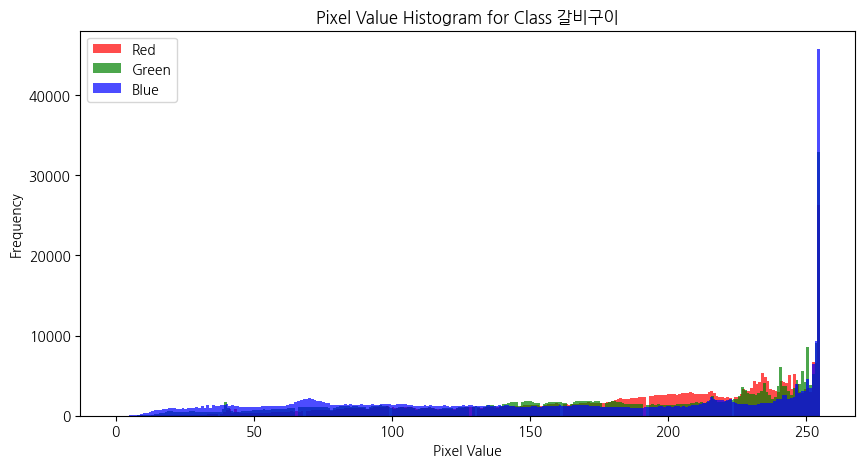

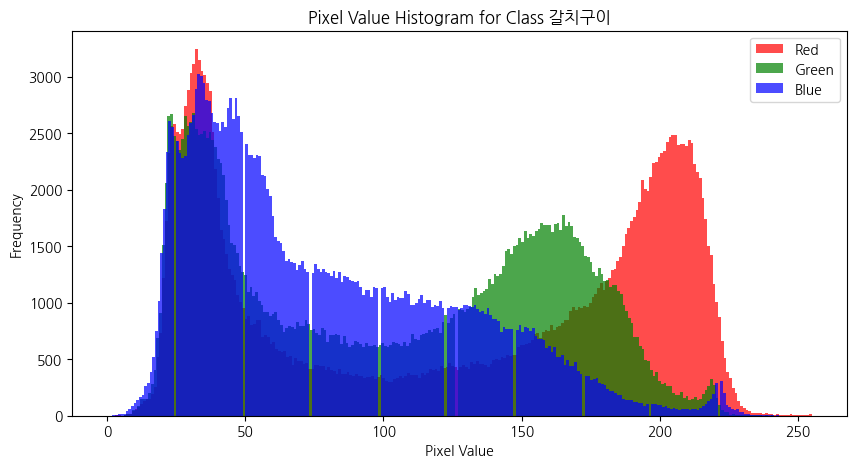

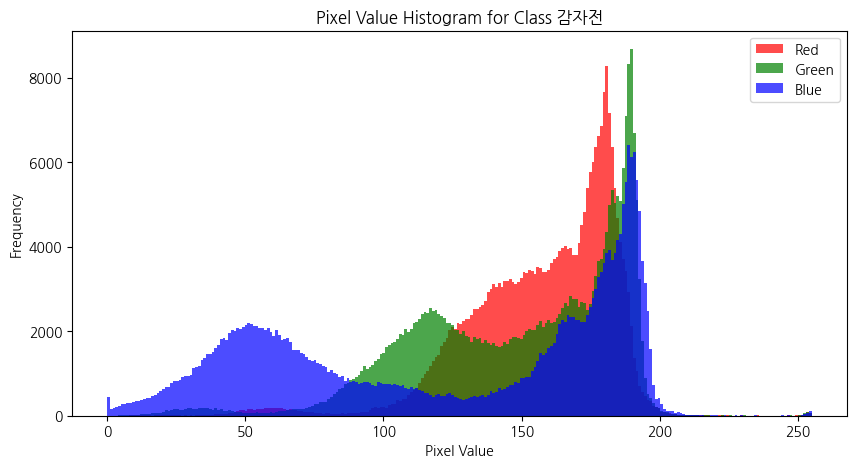

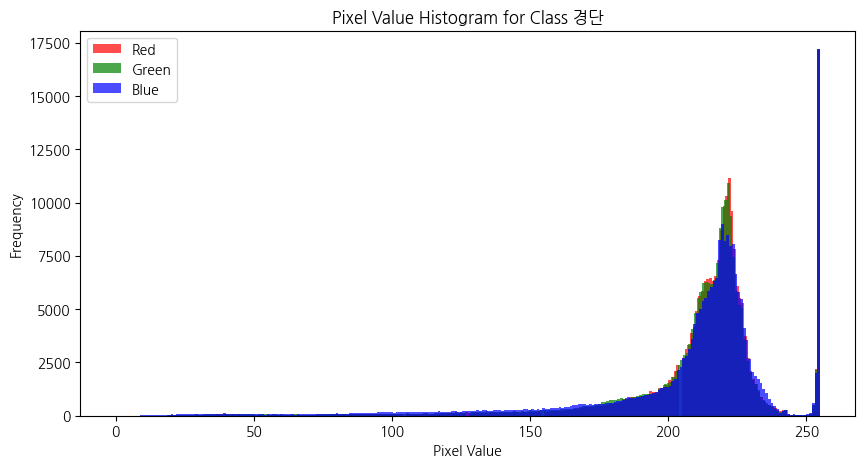

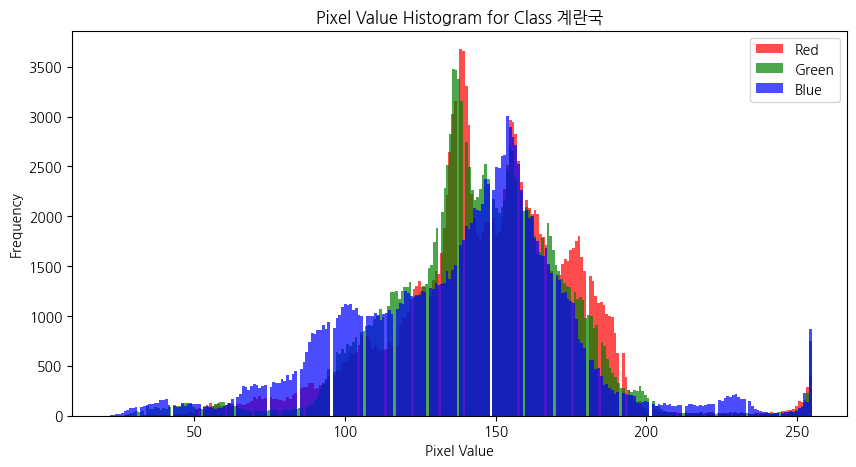

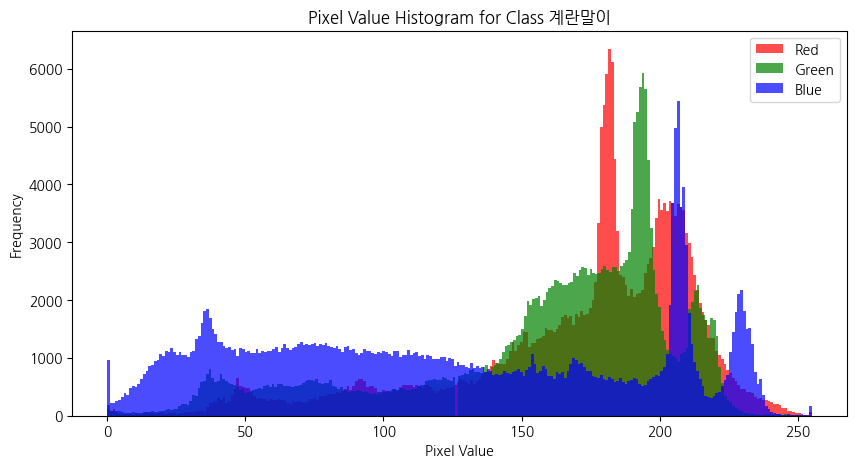

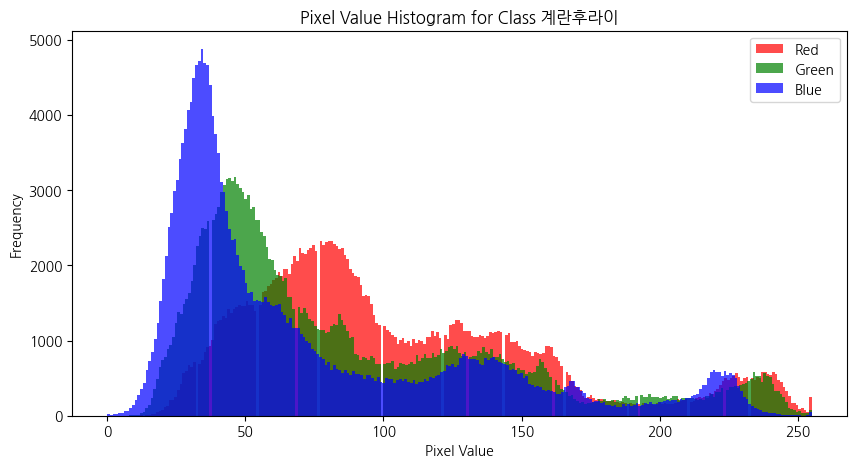

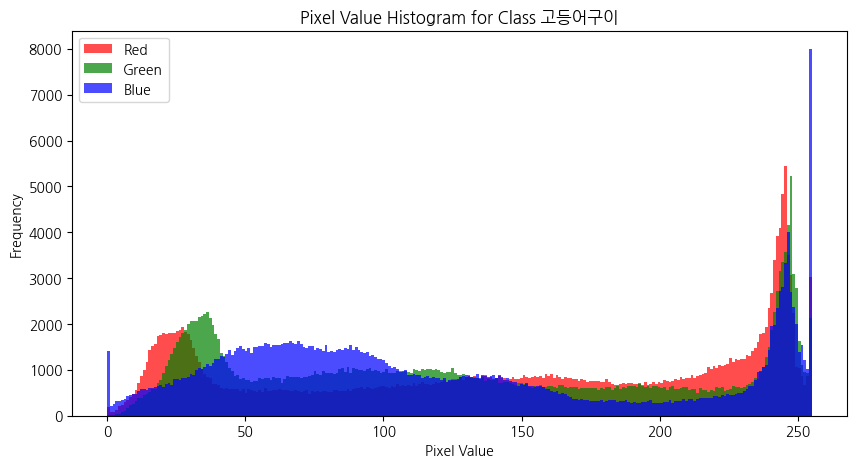

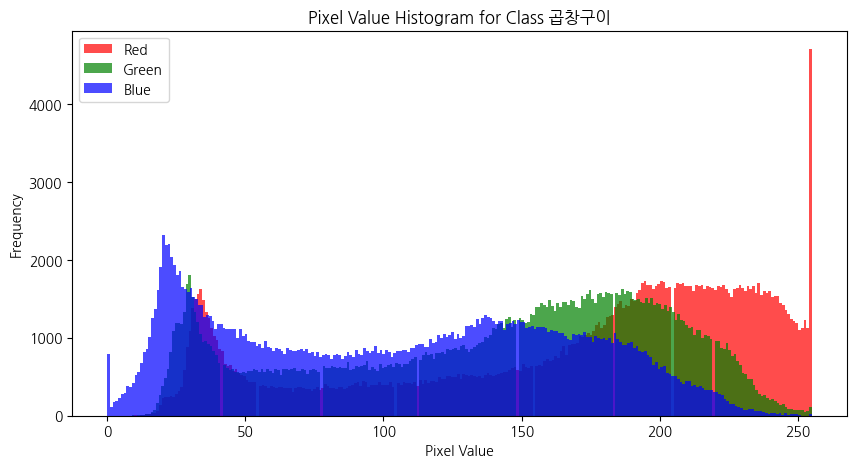

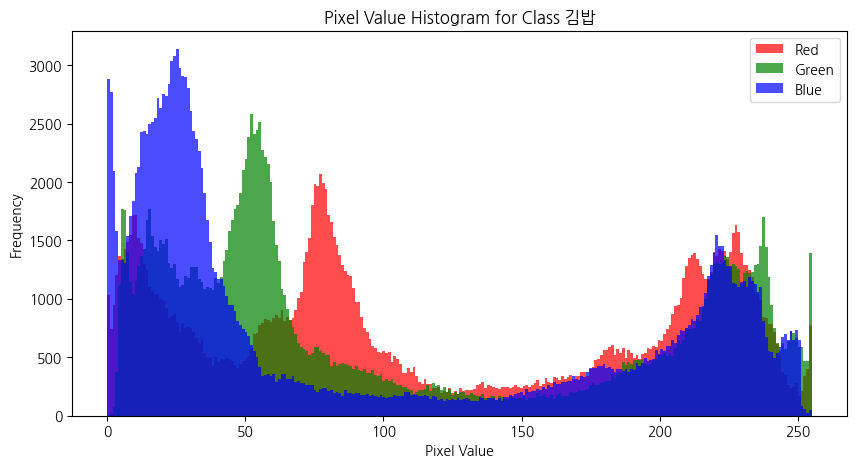

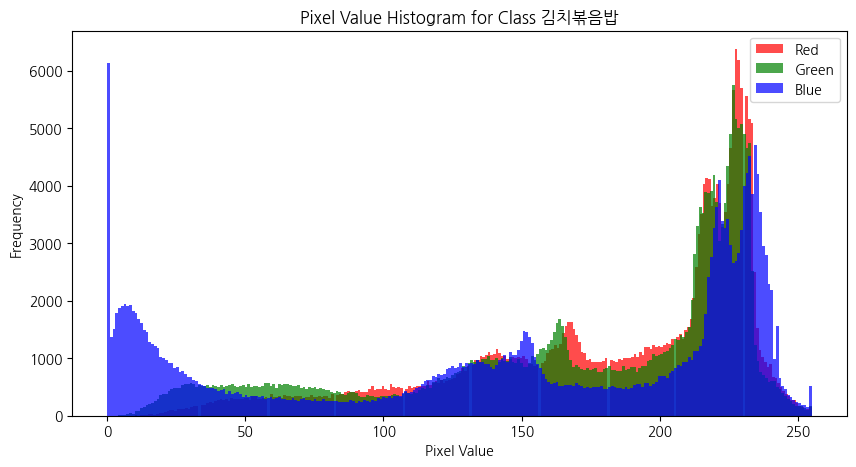

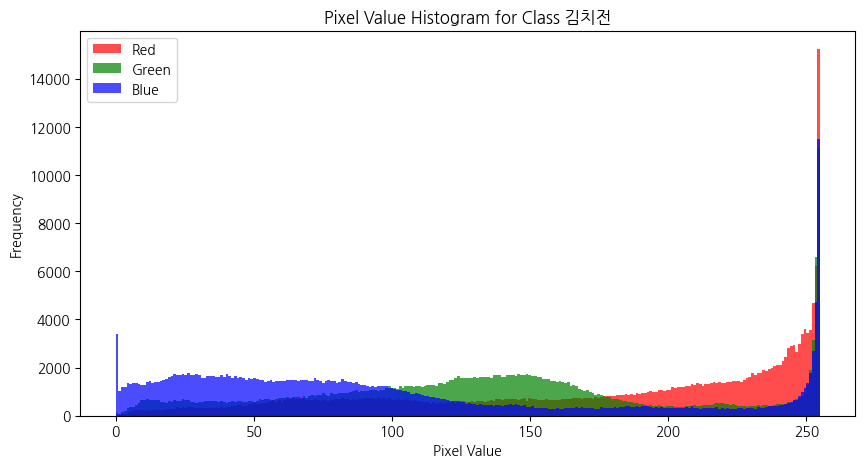

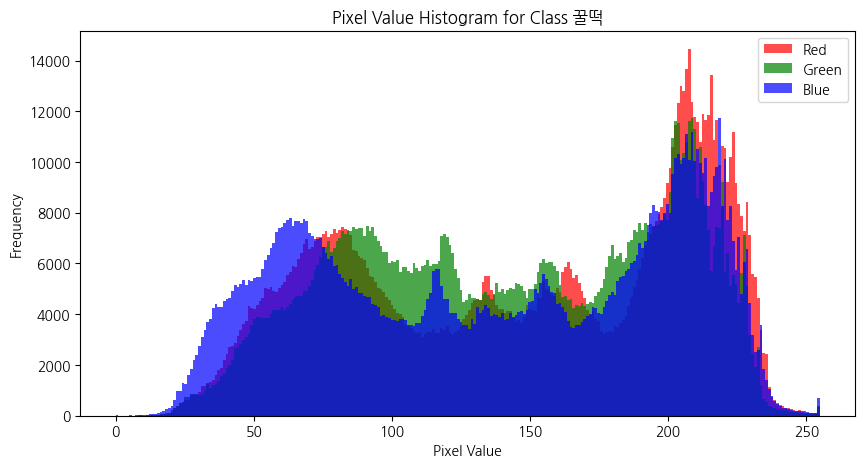

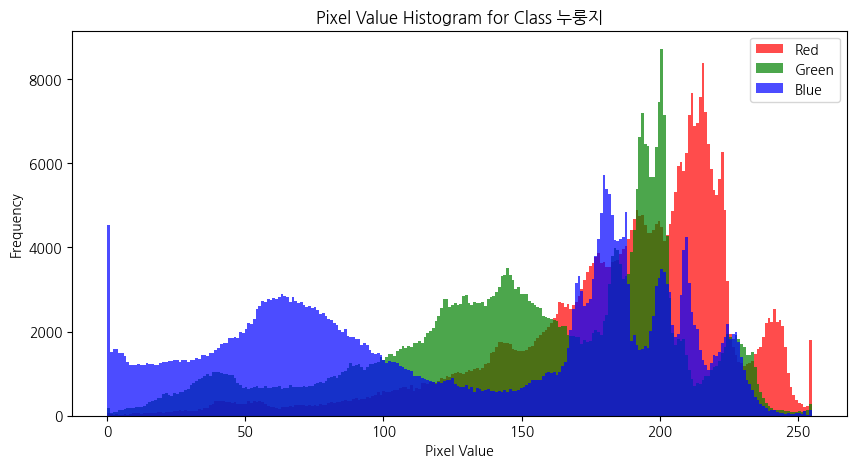

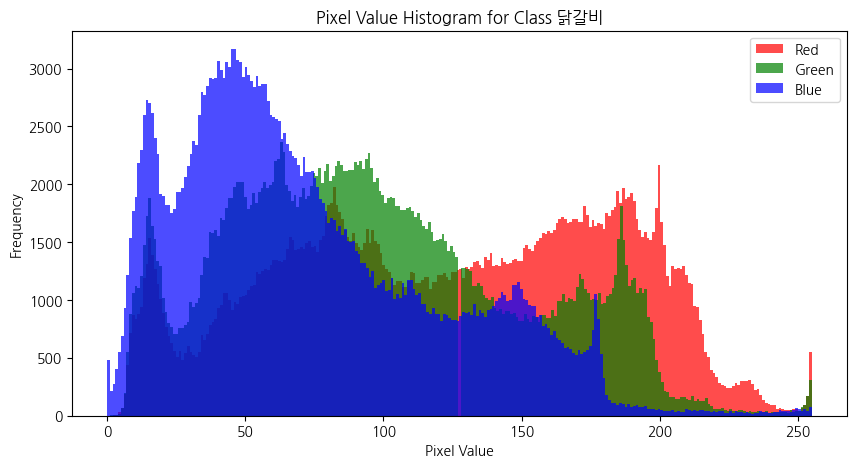

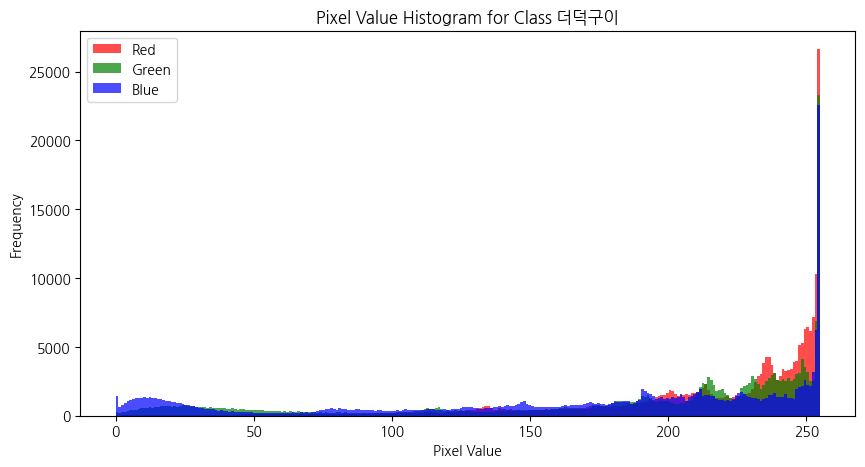

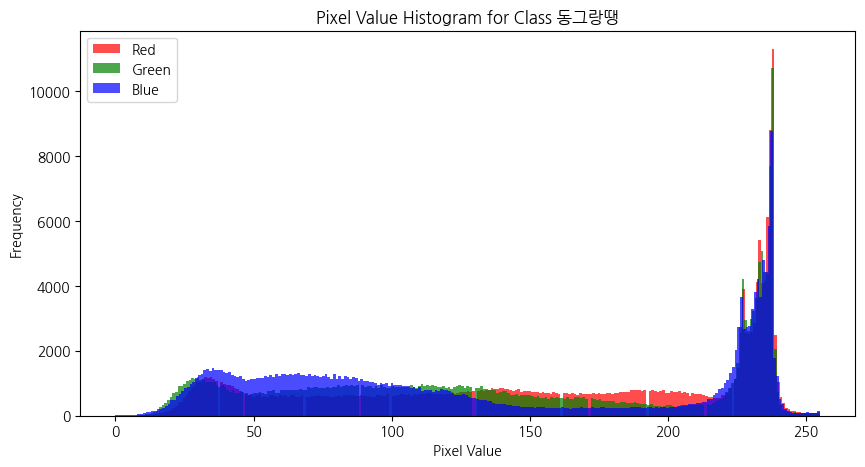

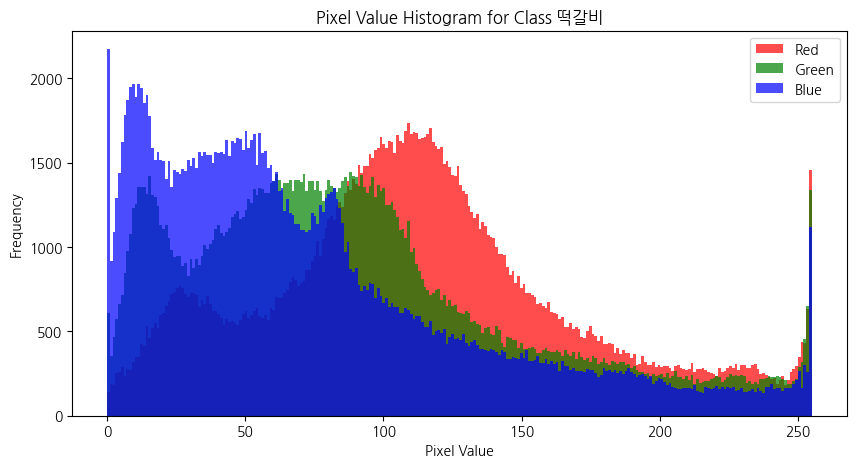

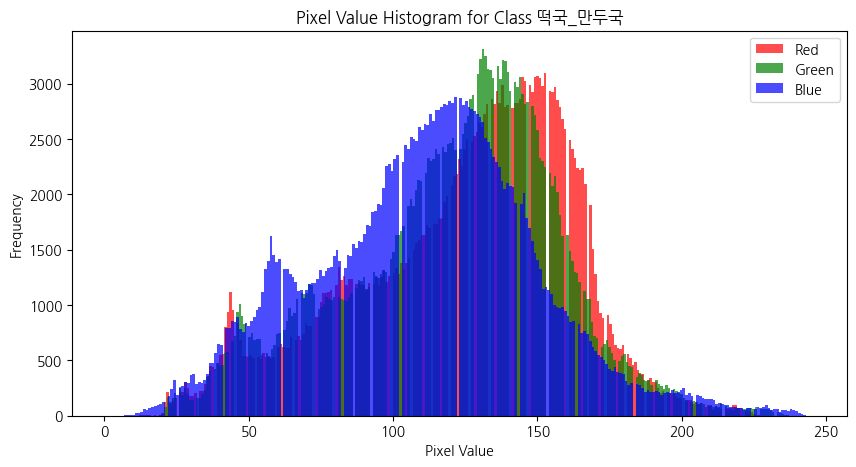

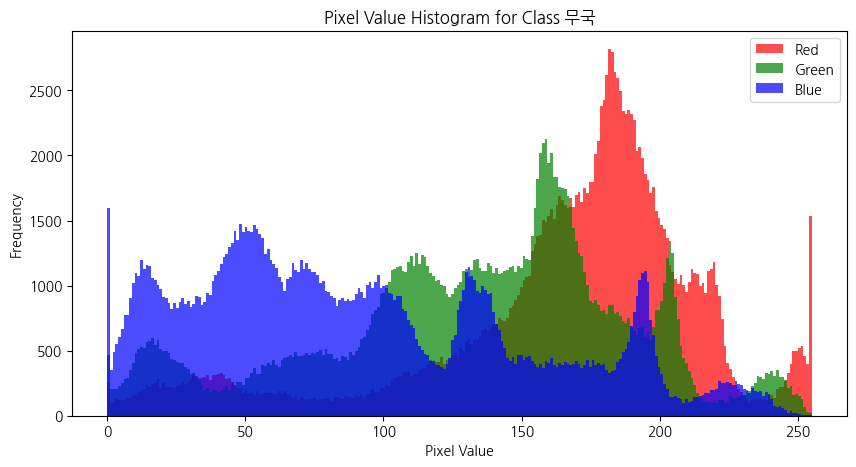

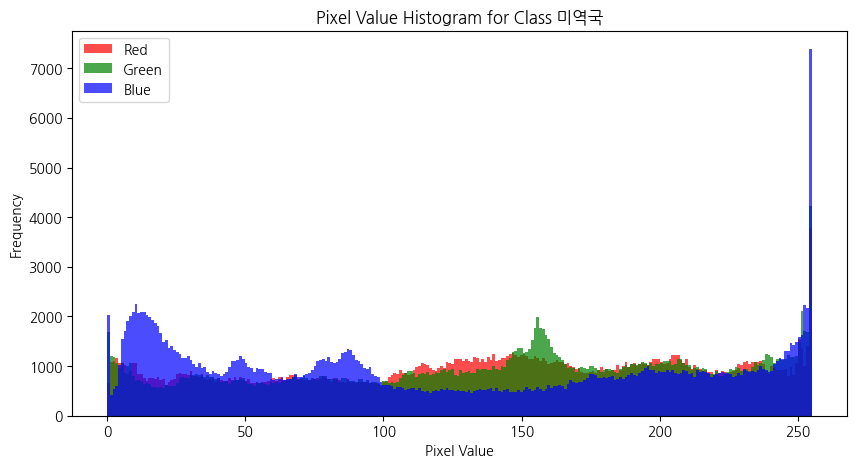

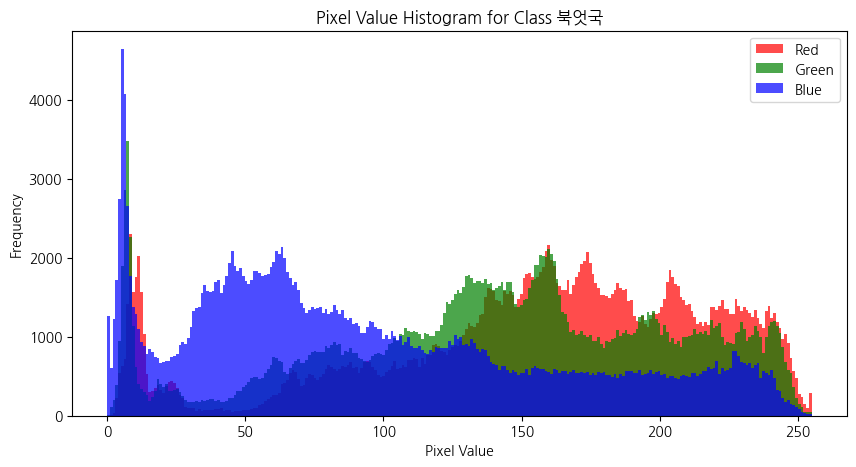

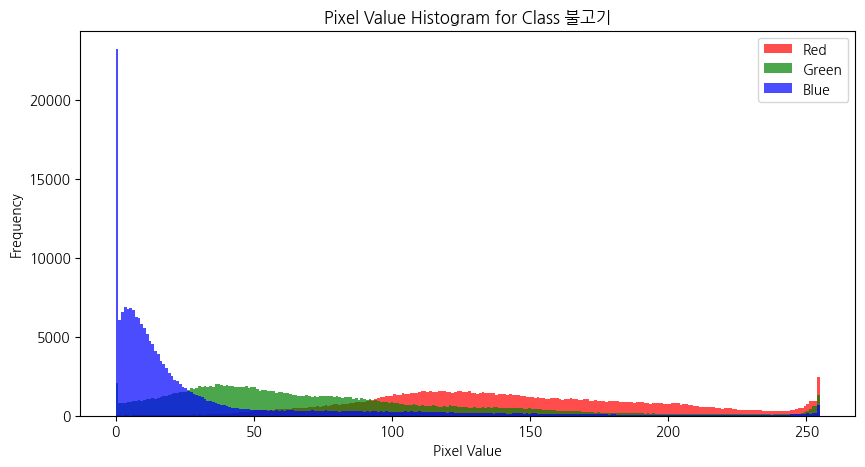

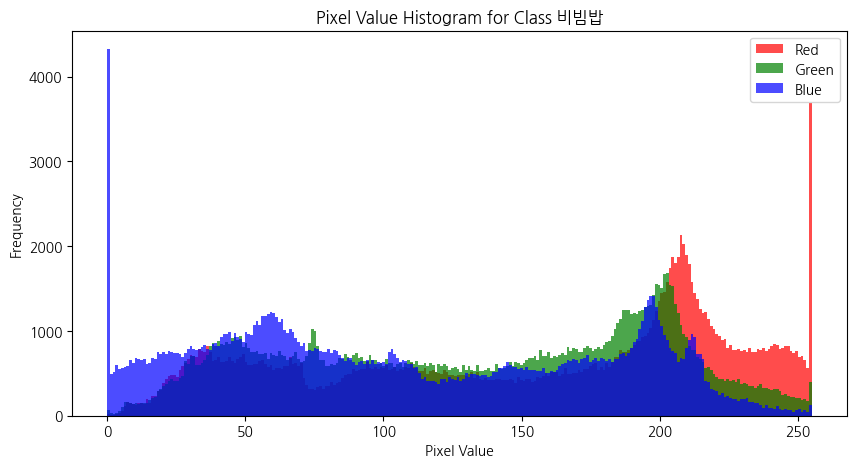

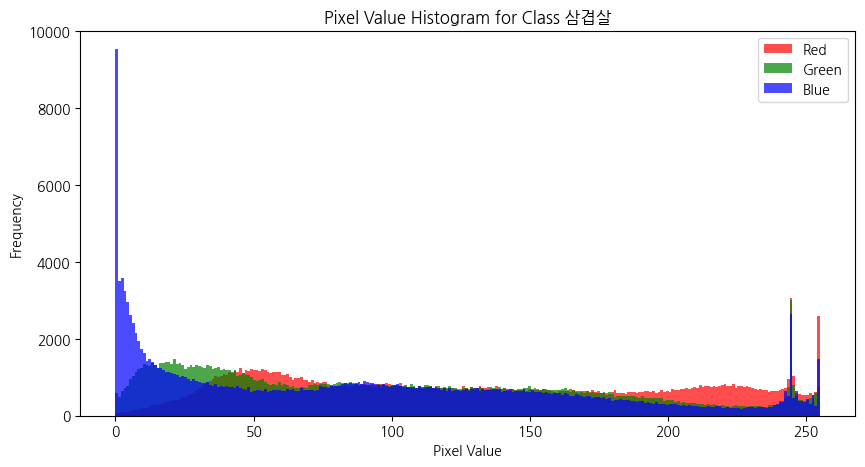

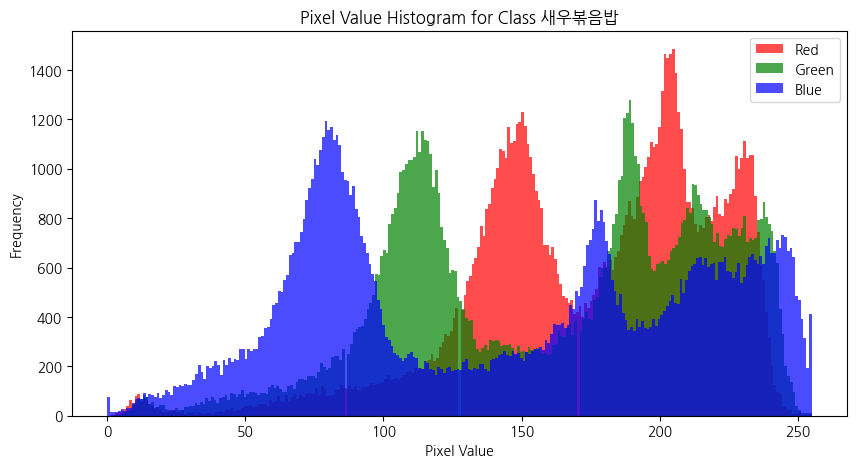

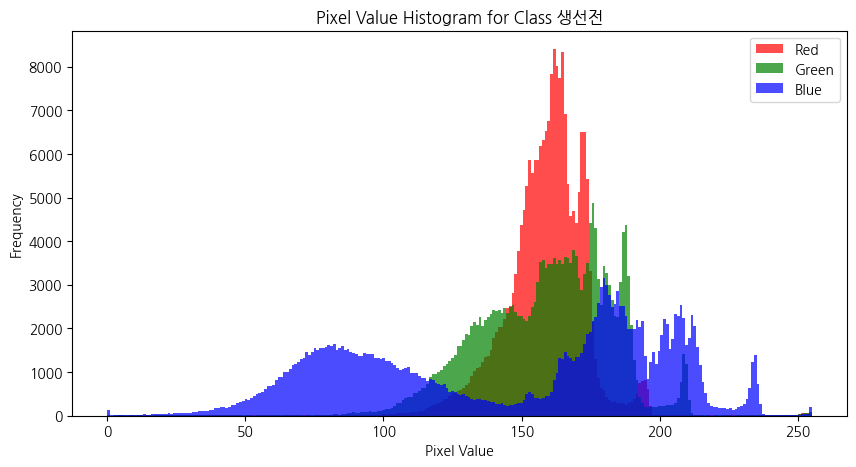

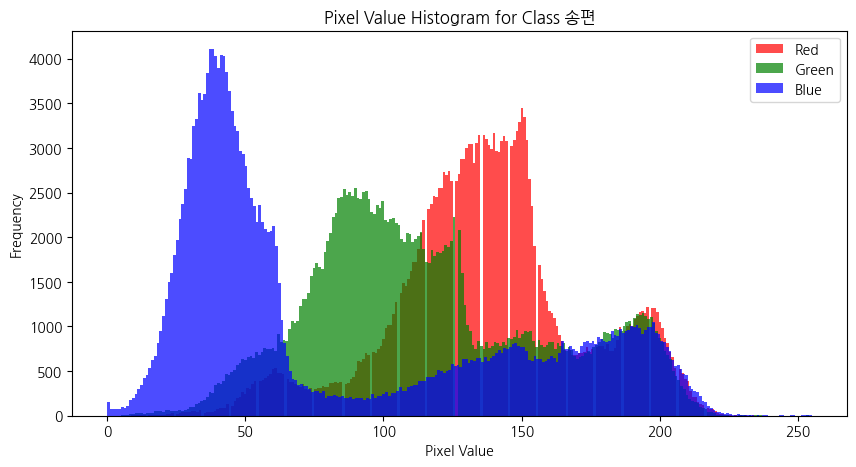

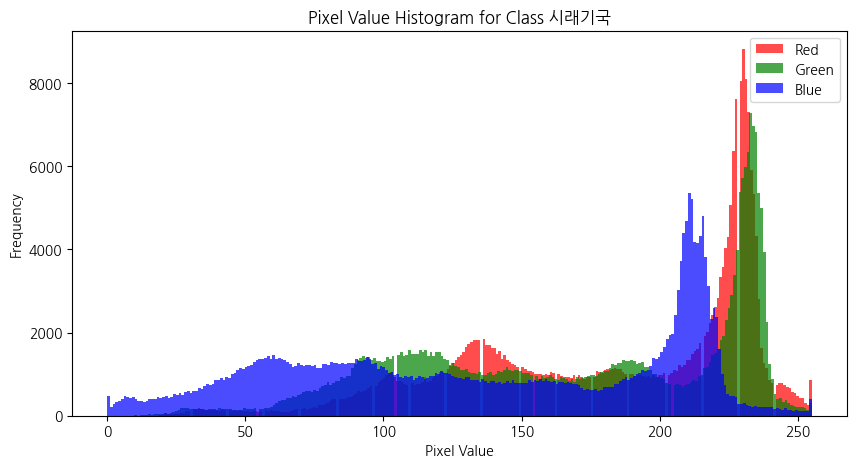

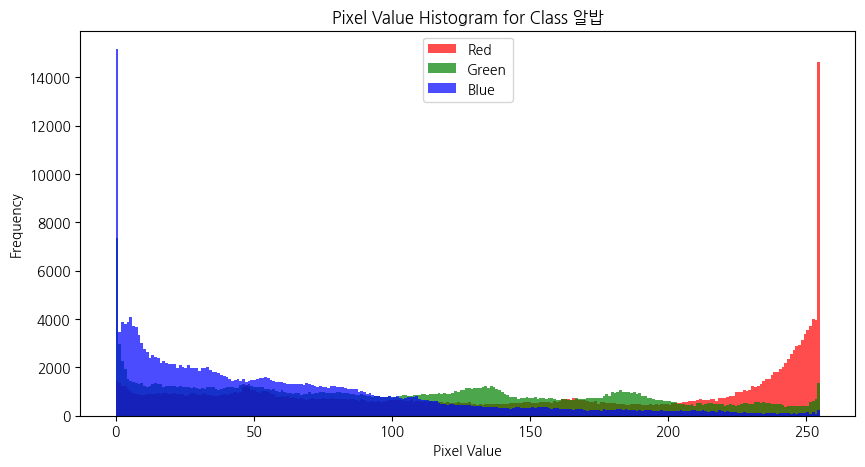

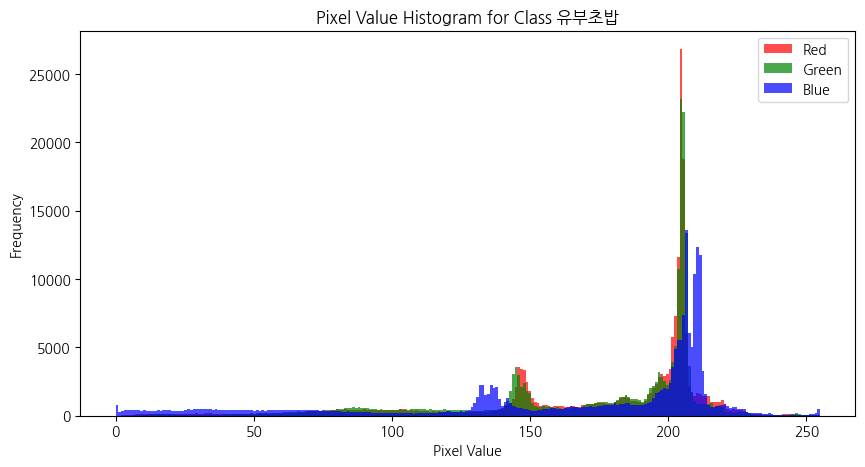

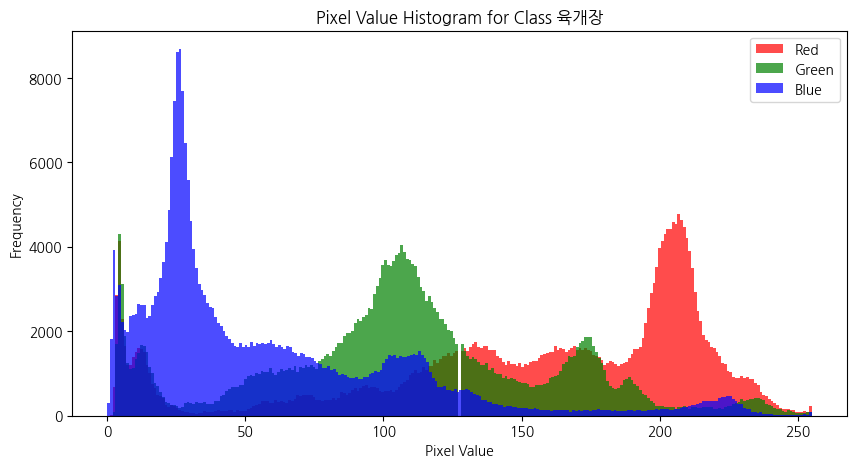

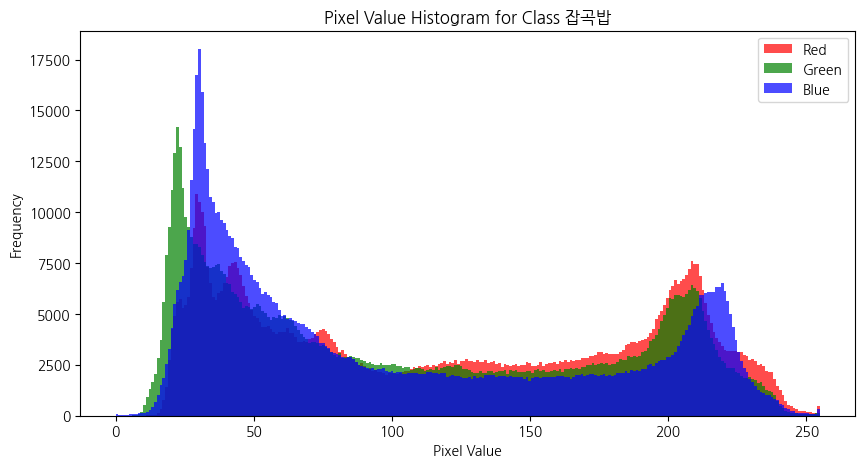

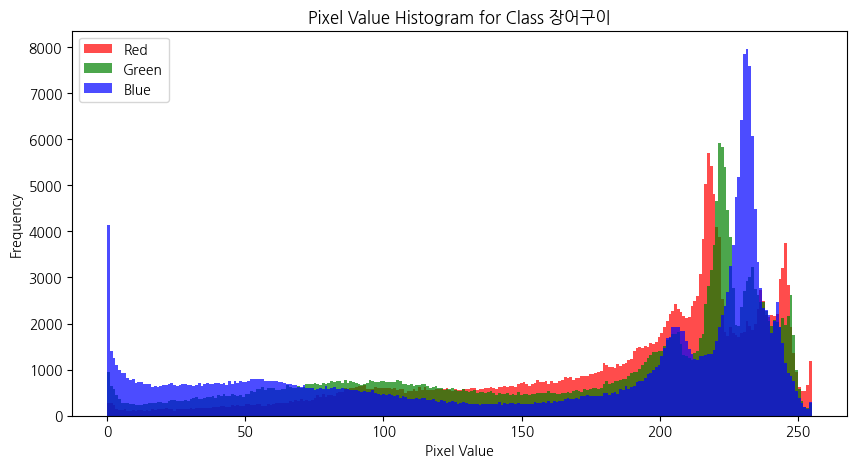

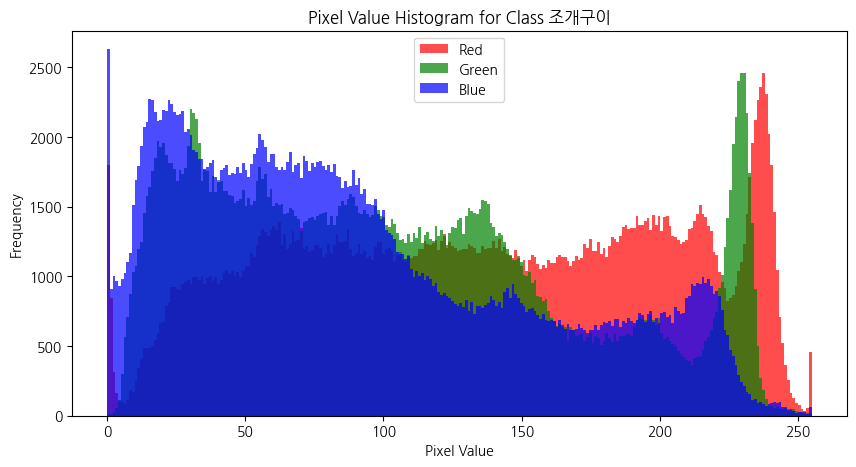

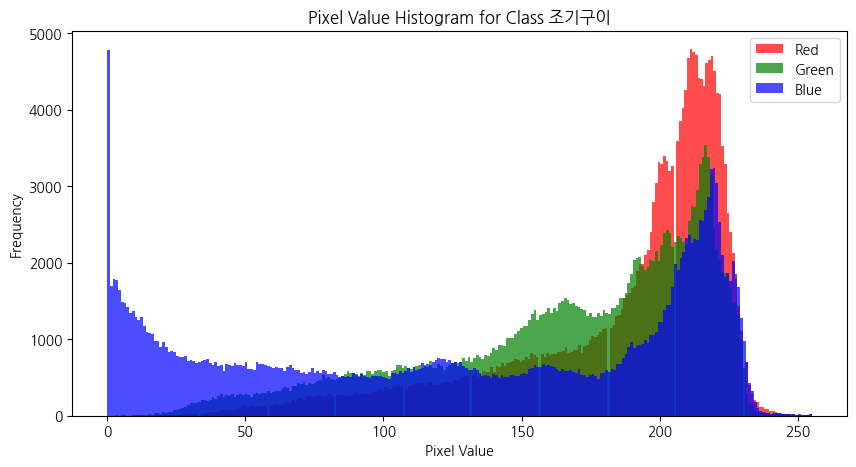

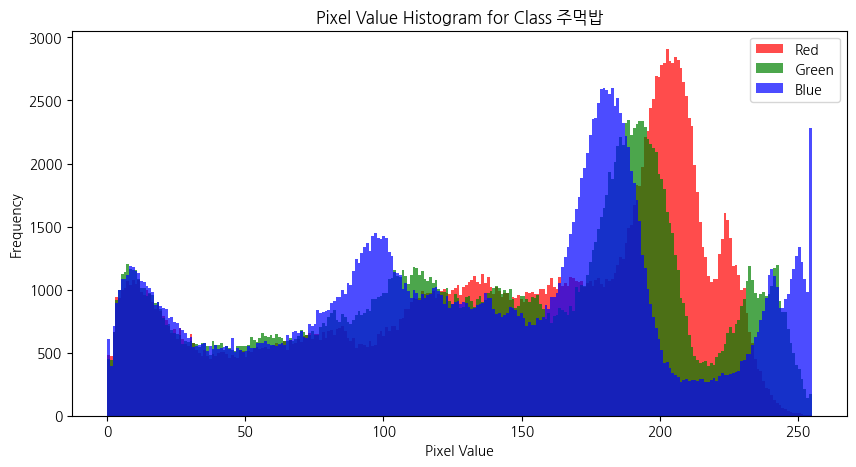

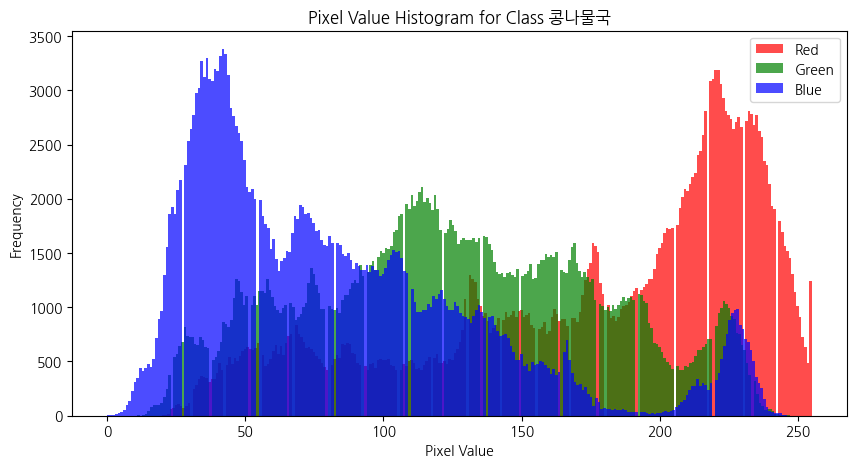

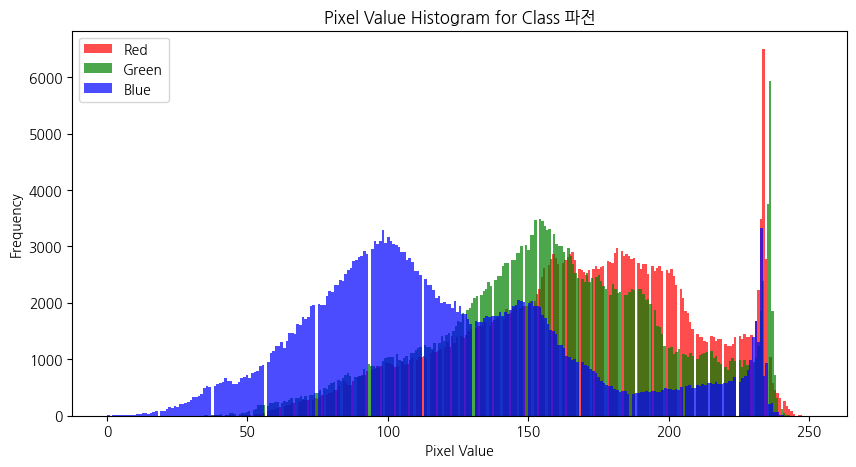

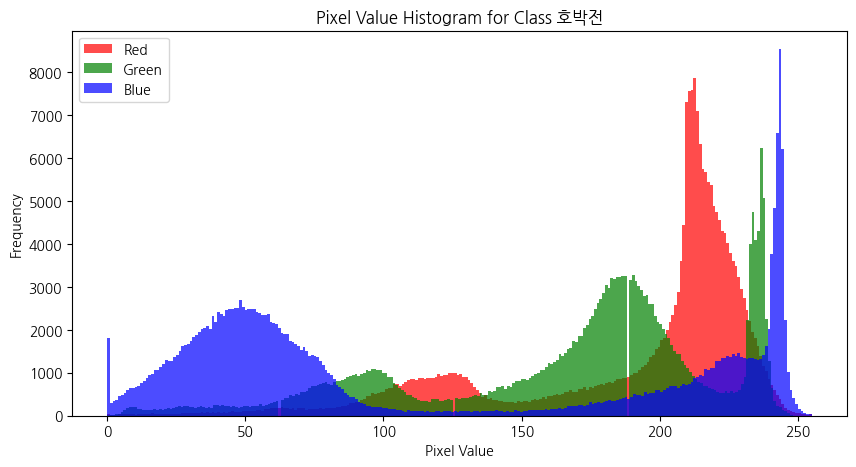

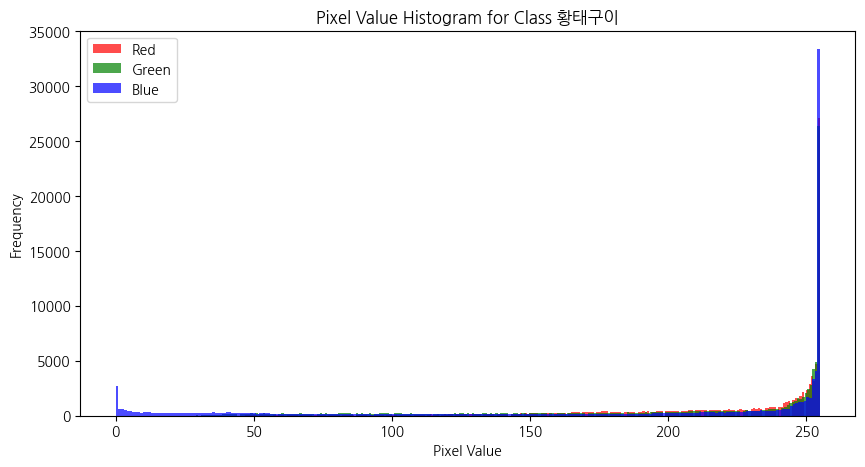

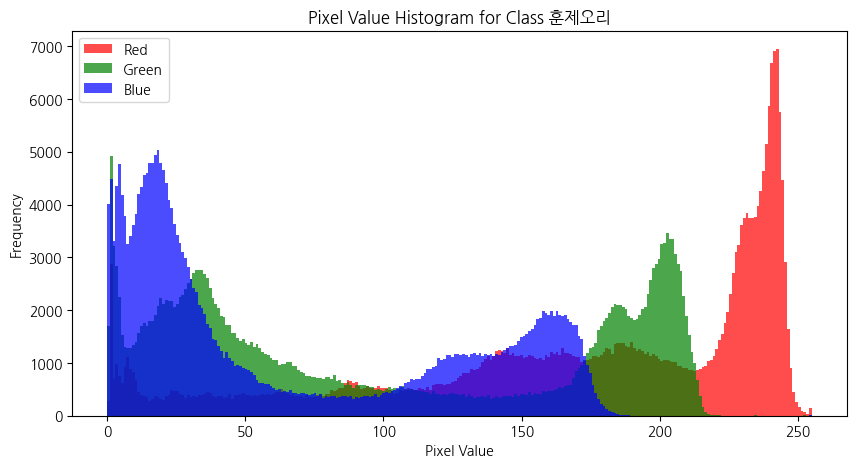

In [ ]:
# 클래스당 한 장의 이미지 뽑기
for class_name in dataset.classes:
    class_path = os.path.join('./kfood_train', class_name)
    image_files = os.listdir(class_path)
    image_path = os.path.join(class_path, image_files[0])
    image = Image.open(image_path)

    # 이미지를 넘파이 배열로 변환하여 히스토그램 그리기
    image_array = np.array(image)

    # R, G, B 채널 분리
    r_channel = image_array[:,:,0]
    g_channel = image_array[:,:,1]
    b_channel = image_array[:,:,2]

    # 각 채널의 히스토그램 그리기
    plt.figure(figsize=(10, 5))
    plt.rc('font', family='NanumGothic')
    plt.hist(r_channel.ravel(), bins=256, color='red', alpha=0.7, label='Red')
    plt.hist(g_channel.ravel(), bins=256, color='green', alpha=0.7, label='Green')
    plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.7, label='Blue')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    class_name = unicodedata.normalize('NFC', class_name)
    plt.title(f'Pixel Value Histogram for Class {class_name}')
    plt.legend()
    plt.show()

# Mission 2-2

## load data

In [ ]:
# 데이터 변환 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),           # 이미지를 PyTorch 텐서로 변환
    transforms.Normalize((0.583953, 0.5138751, 0.422694), (0.22709133, 0.23743126, 0.25394315))  # 이미지 정규화
])

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.RandomRotation(180),  # 180도 랜덤 회전
    transforms.CenterCrop(220),  # 중앙 자르기
    transforms.ToTensor(),           # 이미지를 PyTorch 텐서로 변환
    transforms.Normalize((0.583953, 0.5138751, 0.422694), (0.22709133, 0.23743126, 0.25394315))  # 이미지 정규화
])

# 데이터셋 정의
dataset = ImageFolder(root='./train', transform=transform)
testset = ImageFolder(root='./val', transform=transform)

## cross validation : kfood_health_train을 8:2로 나눠 train과 val로 정의

In [ ]:
torch.manual_seed(1)

# 데이터를 Train과 Validation으로 분리
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader 생성
batch_size = 64

# train_dataset에 transform_train을 적용
train_dataset.dataset.transform = transform_train

trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=4)

In [ ]:
# 데이터수 확인
print(len(dataset))
print(len(train_dataset))
print(len(val_dataset))
print(len(trainloader))
print(len(testloader))
print(len(testset))

33593
26874
6719
420
66
4198


In [ ]:
dataset.class_to_idx.items()

dict_items([('갈비구이', 0), ('갈치구이', 1), ('감자전', 2), ('경단', 3), ('계란국', 4), ('계란말이', 5), ('계란후라이', 6), ('고등어구이', 7), ('곱창구이', 8), ('김밥', 9), ('김치볶음밥', 10), ('김치전', 11), ('꿀떡', 12), ('누룽지', 13), ('닭갈비', 14), ('더덕구이', 15), ('동그랑땡', 16), ('떡갈비', 17), ('떡국_만두국', 18), ('무국', 19), ('미역국', 20), ('북엇국', 21), ('불고기', 22), ('비빔밥', 23), ('삼겹살', 24), ('새우볶음밥', 25), ('생선전', 26), ('송편', 27), ('시래기국', 28), ('알밥', 29), ('유부초밥', 30), ('육개장', 31), ('잡곡밥', 32), ('장어구이', 33), ('조개구이', 34), ('조기구이', 35), ('주먹밥', 36), ('콩나물국', 37), ('파전', 38), ('호박전', 39), ('황태구이', 40), ('훈제오리', 41)])

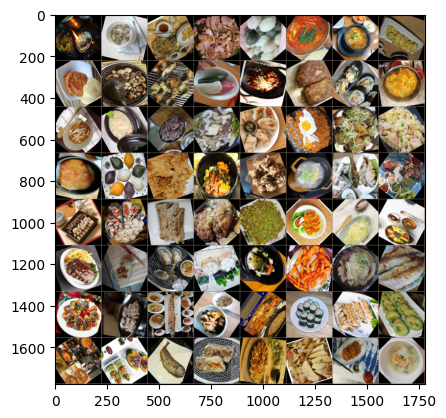

조개구이 시래기국 생선전 훈제오리 꿀떡 육개장 육개장 계란말이 김치볶음밥 조개구이 장어구이 송편 더덕구이 떡갈비 김밥 육개장 콩나물국 누룽지 잡곡밥 곱창구이 감자전 김치볶음밥 떡갈비 새우볶음밥 누룽지 송편 누룽지 알밥 떡갈비 떡국_만두국 조기구이 갈비구이 송편 조개구이 갈치구이 파전 호박전 동그랑땡 계란국 비빔밥 갈비구이 알밥 조개구이 꿀떡 알밥 더덕구이 곱창구이 고등어구이 불고기 떡갈비 갈치구이 계란후라이 닭갈비 김밥 갈치구이 호박전 육개장 잡곡밥 조기구이 갈치구이 동그랑땡 곱창구이 김치전 북엇국


In [ ]:
# 클래스 이름 가져오기
classes = dataset.classes

# unnormalize 함수 정의
def unnormalize(img):
    mean = (0.583953, 0.5138751, 0.422694)
    std = (0.22709133, 0.23743126, 0.25394315)
    img = img * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)
    return img
# imshow 함수 정의
def imshow(img):
    img = unnormalize(img)  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# label 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## using resnet50 train

In [ ]:
from torchvision import models

import torch.nn as nn

#ResNet50 모델
resnet_nopt = models.resnet50(weights=None)   # pretrained weights 사용하지 않음

# fc layer 수정
#기존 ResNet-50 모델의 마지막 fully connected 레이어(fc)의 입력 특성 개수를 가져옴
fc_in_features = resnet_nopt.fc.in_features
#ResNet-50 모델의 마지막 fully connected 레이어(fc)를 새로운 fully connected 레이어로 교체, class에 맞는 새로운 fully connected 레이어를 생성
resnet_nopt.fc = nn.Linear(fc_in_features, len(classes))
#모델을 GPU로 옮깁
resnet_nopt = resnet_nopt.to(device)

In [ ]:
from torchsummary import summary
summary(resnet_nopt, (3,224,224))
# 학습 가능한 파라미터 수 23,594,090

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_nopt.parameters(), lr=0.001)

In [ ]:
resnet_nopt.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 학습 중에 정확도와 손실 기록하기
train_accuracy_list = []
train_loss_list = []
validation_accuracy_list = []
validation_loss_list = []

val_accuracy_max = 0
val_loss_min = 9999999

In [ ]:
# 학습 길이 50 epoch으로 설정하여 학습
for epoch in range(0, 50):

    # train
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet_nopt(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        train_acc = 100 * correct_train / total_train

        # print every 200 mini-batchs
        if i% 200 == 199 :
          print(f'[{epoch+1}, {i+1:5d}] train accuracy : {train_acc:.2f}% , train loss : {running_loss/2000:.3f}')
          running_loss = 0.0

    train_accs = 100 * correct_train / total_train
    train_accuracy_list.append(train_accs)
    train_loss_list.append(running_loss)

    # Validation accuracy & loss
    correct_validation = 0
    total_validation = 0
    validation_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for validation
        for i, data in enumerate(valloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = resnet_nopt(inputs)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

            # Accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_validation += labels.size(0)
            correct_validation += (predicted == labels).sum().item()

    validation_acc = 100 * correct_validation / total_validation
    print(f'epoch {epoch+1}: validation accuracy - {validation_acc:.2f}%, validation loss - {validation_loss/len(valloader):.3f}')

    validation_accuracy_list.append(validation_acc)
    validation_loss_list.append(validation_loss)

    # best model checkpoint에 저장
    if validation_acc > val_accuracy_max:
      val_accuracy_max = validation_acc
      torch.save(resnet_nopt.state_dict(), './mission2_acc_64.pt')
    if validation_loss < val_loss_min:
      val_loss_min = validation_loss
      torch.save(resnet_nopt.state_dict(), './mission2_loss_64.pt')

print('Finished Training')

[1,   200] train accuracy : 9.66% , train loss : 0.341
[1,   400] train accuracy : 12.89% , train loss : 0.304
epoch 1: validation accuracy - 19.12%, validation loss - 2.910
[2,   200] train accuracy : 19.88% , train loss : 0.286
[2,   400] train accuracy : 21.76% , train loss : 0.269
epoch 2: validation accuracy - 26.85%, validation loss - 2.571
[3,   200] train accuracy : 27.92% , train loss : 0.251
[3,   400] train accuracy : 29.78% , train loss : 0.238
epoch 3: validation accuracy - 32.64%, validation loss - 2.312
[4,   200] train accuracy : 35.55% , train loss : 0.223
[4,   400] train accuracy : 36.11% , train loss : 0.215
epoch 4: validation accuracy - 39.92%, validation loss - 2.049
[5,   200] train accuracy : 40.18% , train loss : 0.203
[5,   400] train accuracy : 41.05% , train loss : 0.195
epoch 5: validation accuracy - 41.84%, validation loss - 1.943
[6,   200] train accuracy : 44.57% , train loss : 0.186
[6,   400] train accuracy : 45.53% , train loss : 0.179
epoch 6: valid

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-2d1c254954a1>", line 9, in <cell line: 2>
    for i, data in enumerate(trainloader, 0):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 630, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1345, in _next_data
    return self._process_data(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1371, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.10/dist-packages/torch/_utils.py", line 694, in reraise
    raise exception
OSError: Caught OSError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py"

In [ ]:
PATH = './mission2_64.pt'
torch.save(resnet_nopt.state_dict(),PATH) # 지정한 경로에 학습한 파라미터 저장

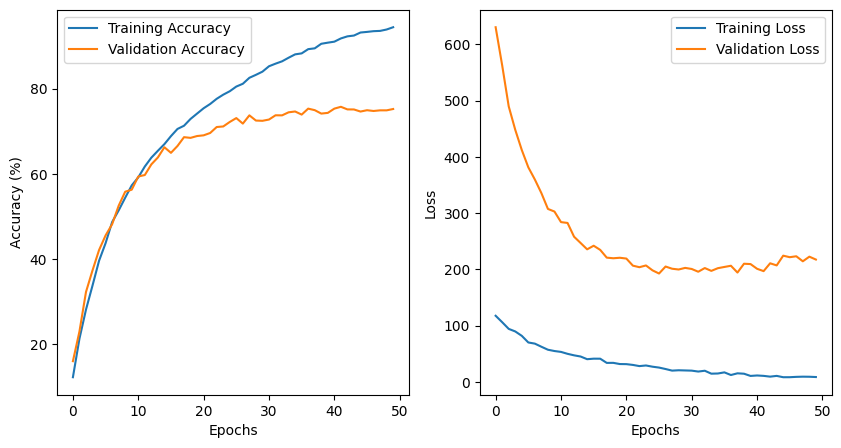

In [ ]:
# 학습 중에 정확도와 손실 기록 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_list, label='Training Accuracy')
plt.plot(validation_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss_list, label='Training Loss')
plt.plot(validation_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## top1 accuracy

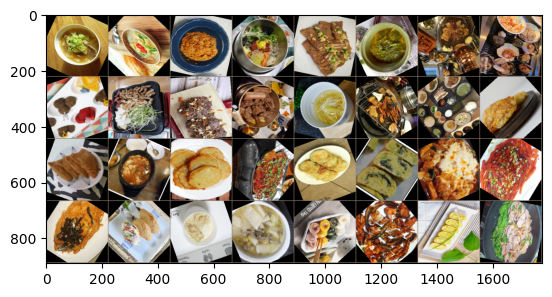

GroundTruth:  무국 계란국 김치볶음밥 비빔밥 갈비구이 시래기국 갈비구이 조개구이 경단 곱창구이 떡갈비 갈비구이 무국 삼겹살 시래기국 감자전 유부초밥 육개장 감자전 황태구이 호박전 계란말이 닭갈비 더덕구이 김치볶음밥 유부초밥 떡국_만두국 무국 꿀떡 장어구이 계란말이 훈제오리


In [ ]:
# valloader 이미지, 라벨 가져오기
dataiter = iter(valloader)
images, labels = next(dataiter)

# 클래스 이름 가져오기
classes = dataset.classes

# unnormalize함수 정의
def unnormalize(img):
    mean = (0.583953, 0.5138751, 0.422694)
    std = (0.22709133, 0.23743126, 0.25394315)
    img = img * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)
    return img

# inshow함수 정의
def imshow(img):
    img = unnormalize(img)  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# print images , GroundTruth: 실제 이미지 라벨
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# 모델, 이미지 GPU 이동
resnet_nopt = resnet_nopt.to(device)
images = images.to(device)

# 이미지 입력, 출력 계산
outputs = resnet_nopt(images)

In [ ]:
_, predicted = torch.max(outputs, 1) # 각 class의 확률이 가장 높은 것만 출력

# 예측 label 출력
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(batch_size)))

Predicted:  무국 동그랑땡 김치볶음밥 비빔밥 갈비구이 시래기국 삼겹살 조개구이 경단 훈제오리 불고기 갈비구이 북엇국 닭갈비 갈치구이 감자전 유부초밥 육개장 감자전 황태구이 동그랑땡 계란말이 닭갈비 황태구이 김치볶음밥 유부초밥 동그랑땡 떡국_만두국 송편 장어구이 계란말이 훈제오리


In [ ]:
# Validation accuracy
val_correct = 0
val_total = 0

with torch.no_grad():
    for data in valloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet_nopt(images)
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * val_correct // val_total} %')

Validation Accuracy: 75 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in valloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet_nopt(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: 갈비구이 is 66.0 %
Accuracy for class: 갈치구이 is 75.8 %
Accuracy for class: 감자전 is 60.0 %
Accuracy for class: 경단 is 75.3 %
Accuracy for class: 계란국 is 87.2 %
Accuracy for class: 계란말이 is 78.8 %
Accuracy for class: 계란후라이 is 82.0 %
Accuracy for class: 고등어구이 is 53.0 %
Accuracy for class: 곱창구이 is 71.8 %
Accuracy for class: 김밥 is 79.2 %
Accuracy for class: 김치볶음밥 is 76.0 %
Accuracy for class: 김치전 is 81.5 %
Accuracy for class: 꿀떡 is 62.7 %
Accuracy for class: 누룽지 is 73.0 %
Accuracy for class: 닭갈비 is 77.3 %
Accuracy for class: 더덕구이 is 77.5 %
Accuracy for class: 동그랑땡 is 78.5 %
Accuracy for class: 떡갈비 is 69.3 %
Accuracy for class: 떡국_만두국 is 82.5 %
Accuracy for class: 무국 is 70.3 %
Accuracy for class: 미역국 is 91.1 %
Accuracy for class: 북엇국 is 73.6 %
Accuracy for class: 불고기 is 70.1 %
Accuracy for class: 비빔밥 is 74.0 %
Accuracy for class: 삼겹살 is 60.6 %
Accur

## visualization

In [ ]:
correct_samples = {classname: [] for classname in classes}
incorrect_samples = {classname: [] for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = resnet_nopt(images.to(device))
    _, predictions = torch.max(outputs.data, 1)

    # collect the correct and incorrect predictions for each class
    for label, prediction, image in zip(labels, predictions, images):
      classname = classes[label]
      if label == prediction:
        correct_samples[classname].append(image.cpu())
      else:
        incorrect_samples[classname].append(image.cpu())

In [ ]:
# Print sample images for each class
for classname in classes:
  print(f"Correct predictions for class {classname}:")
  plt.figure(figsize=(20, 6))
  for i, sample in enumerate(correct_samples[classname][:30]):
    plt.subplot(3, 10, i+1)
    plt.imshow(sample.permute(1, 2, 0).cpu().numpy().clip(0,1))
    plt.axis('off')
  plt.show()

  print(f"Incorrect predictions for class {classname}:")
  plt.figure(figsize=(20, 6))
  for i, sample in enumerate(incorrect_samples[classname][:30]):
    plt.subplot(3, 10, i+1)
    plt.imshow(sample.permute(1, 2, 0).cpu().numpy().clip(0,1))
    plt.axis('off')
  plt.show()

  print('--------------------------------------------------------------------')


## validation 채점 : kfood_val 데이터 사용해서 정확도 측정

In [ ]:
# 채점시 사용되는 코드
@torch.no_grad()
def validate_epoch(model: nn.Module, data_loader: DataLoader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(data_loader, total=len(data_loader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.concat(accuracies).float().mean() * 100
    return accuracy.item()

In [ ]:
validate_epoch(resnet_nopt,testloader,device)

measuring accuracy:   0%|          | 0/132 [00:00<?, ?it/s]

71.01000213623047

# checkpoint loader

In [ ]:
# 저장했던 mission2.pt 불러오기

PATH = './mission2_loss.pt'

resnet_nopt = models.resnet50(weights=None)
resnet_nopt.fc = nn.Linear(resnet_nopt.fc.in_features, 42)

resnet_nopt.load_state_dict(torch.load(PATH))
resnet_nopt = resnet_nopt.to(device)

# 평가모드
resnet_nopt.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 채점시 사용되는 코드
@torch.no_grad()
def validate_epoch(model: nn.Module, data_loader: DataLoader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(data_loader, total=len(data_loader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.concat(accuracies).float().mean() * 100
    return accuracy.item()

In [ ]:
validate_epoch(resnet_nopt,testloader,device)

measuring accuracy:   0%|          | 0/132 [00:00<?, ?it/s]

75.53597259521484